<a href="https://colab.research.google.com/github/abelranni/modelos-de-simulacion/blob/main/ejercicios-resueltos/_1-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado

Se realizan 1000 ensayos de arrojar cinco (5) monedas y se registra el número de caras obtenidas. A continuación, se detallan las cantidades obtenidas:

| Numero de Caras Obtenidas | Frecuencia Observada |
| ------------------------- | -------------------- |
| 0                         | 38                   |
| 1                         | 144                  |
| 2                         | 342                  |
| 3                         | 287                  |
| 4                         | 164                  |
| 5                         | 25                   |

## Solución

Tenemos datos de un experimento donde se lanzaron cinco monedas 1000 veces y se registró el número de caras obtenidas. 
Se desea realizar una prueba de bondad de ajuste para verificar si los datos siguen una distribución binomial con n = 5 ensayos y p = 0.5 (probabilidad de éxito, es decir, obtener cara en cada lanzamiento) con un nivel de significancia α.

Primero, calculamos las frecuencias esperadas según la distribución binomial y luego realizamos la prueba de bondad de ajuste utilizando el estadístico chi-cuadrado.

   Número de caras  Frecuencia observada  Frecuencia esperada  \
0                0                    38                31.25   
1                1                   144               156.25   
2                2                   342               312.50   
3                3                   287               312.50   
4                4                   164               156.25   
5                5                    25                31.25   

   Término chi-cuadrado  
0                1.4580  
1                0.9604  
2                2.7848  
3                2.0808  
4                0.3844  
5                1.2500  


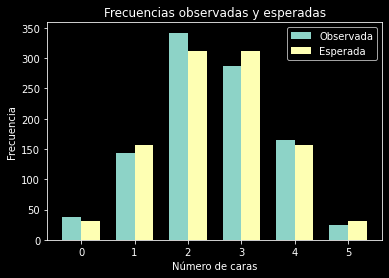

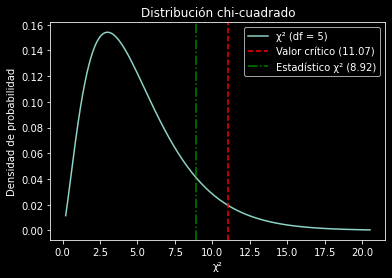


No rechazamos la hipótesis nula. Los datos pueden seguir una distribución binomial.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, chi2

# Datos y parámetros
observed_freq = np.array([38, 144, 342, 287, 164, 25])
n = 5
p = 0.5
num_ensayos = 1000
alpha = 0.05

# Calcular las frecuencias esperadas
expected_freq = [num_ensayos * binom.pmf(k, n, p) for k in range(0, n+1)]

# Calcular el estadístico chi-cuadrado
chi_squared_terms = (observed_freq - expected_freq)**2 / expected_freq
chi_squared_stat = np.sum(chi_squared_terms)

# Valor crítico de chi-cuadrado
df = len(observed_freq) - 1 # grados de libertad
chi_critical = chi2.ppf(1-alpha, df)

# Crear y mostrar la tabla
table_data = {
    'Número de caras': list(range(0, n+1)),
    'Frecuencia observada': observed_freq,
    'Frecuencia esperada': expected_freq,
    'Término chi-cuadrado': chi_squared_terms
}
df_table = pd.DataFrame(table_data)
print(df_table)


# Gráfico de barras de frecuencias observadas y esperadas
x_labels = list(range(0, n+1))
x_ticks = np.arange(len(x_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x_ticks - width/2, observed_freq, width, label='Observada')
rects2 = ax.bar(x_ticks + width/2, expected_freq, width, label='Esperada')

ax.set_ylabel('Frecuencia')
ax.set_xlabel('Número de caras')
ax.set_title('Frecuencias observadas y esperadas')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.legend()
plt.show()

# Gráfico de distribución chi-cuadrado
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 1000)
plt.plot(x, chi2.pdf(x, df), label=f'χ^2 (df = {df})')
plt.axvline(chi_critical, color='r', linestyle='--', label=f'Valor crítico ({chi_critical:.2f})')
plt.axvline(chi_squared_stat, color='g', linestyle='-.', label=f'Estadístico χ^2 ({chi_squared_stat:.2f})')
plt.xlabel('χ^2')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución chi-cuadrado')
plt.legend()
plt.show()

# Resultado
if chi_squared_stat > chi_critical:
    print("\nRechazamos la hipótesis nula. Los datos no siguen una distribución binomial.")
else:
    print("\nNo rechazamos la hipótesis nula. Los datos pueden seguir una distribución binomial.")
